In [29]:
import ffn # function for quantitative analysis in python
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
#calculate mean variance for faang stocks + microsoft and S&P500
# to get price at open do x:Open where x is ticker. Similar for close. Note: default is close
price = ffn.get('fb, amzn, aapl, nflx, googl, msft, spy', start = '2010-01-01').to_returns().dropna() 

mean_var = price.calc_mean_var_weights().as_format('.2%')
mean_var
#msft = ffn.get('MSFT', start = '2010-01-01')
#spy = ffn.get('SPY', start = '2010-01-01')


fb        4.94%
amzn     28.40%
aapl     18.60%
nflx     26.83%
googl     0.00%
msft     21.24%
spy       0.00%
dtype: object

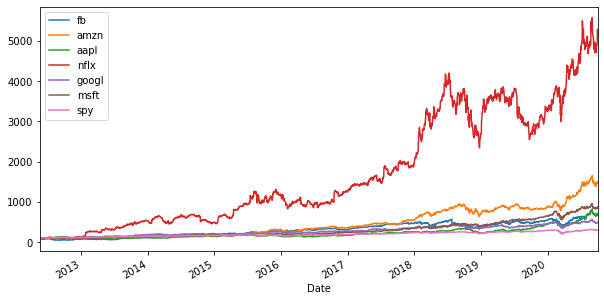

In [40]:
#comparing performance of stocks relative to each other
rel = ffn.get('fb, amzn, aapl, nflx, googl, msft, spy', start = '2010-01-01').rebase().plot(figsize = (10, 5))


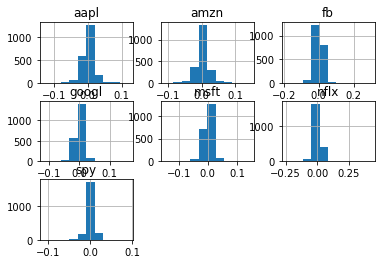

In [33]:
#histogram of distributions of returns
returns = price.hist()


In [35]:
#stats
stats = price.calc_stats().display()

Stat                 fb          amzn        aapl        nflx        googl        msft        spy
-------------------  ----------  ----------  ----------  ----------  -----------  ----------  ----------
Start                2012-05-21  2012-05-21  2012-05-21  2012-05-21  2012-05-21   2012-05-21  2012-05-21
End                  2020-10-02  2020-10-02  2020-10-02  2020-10-02  2020-10-02   2020-10-02  2020-10-02
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%        0.00%       0.00%

Total Return         -77.16%     -250.01%    -155.41%    -282.17%    -195.07%     -279.96%    -155.24%
Daily Sharpe         -           -           -           -           -            -           -
Daily Sortino        -           -           -           -           inf          -           -
CAGR                 -16.18%     -           -           -           -            -           -
Max Drawdown         -398.25%    -229.03%    -271.35%    -320.79%    -327.36%     -400.72%    -

In [37]:
#check for correlations among the stocks i.e. perfectly positive = +1, perfectly negative = -1 and no correlation = 0
cor = price.corr().as_format('.2f')
cor

,fb,amzn,aapl,nflx,googl,msft,spy
fb,1.00,0.44,0.38,0.28,0.49,0.41,0.47
amzn,0.44,1.00,0.44,0.43,0.60,0.55,0.56
aapl,0.38,0.44,1.00,0.25,0.52,0.57,0.67
nflx,0.28,0.43,0.25,1.00,0.40,0.35,0.37
googl,0.49,0.60,0.52,0.40,1.00,0.64,0.70
msft,0.41,0.55,0.57,0.35,0.64,1.00,0.76
spy,0.47,0.56,0.67,0.37,0.70,0.76,1.00


<module 'matplotlib.pyplot' from 'c:\\users\\upadhya\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

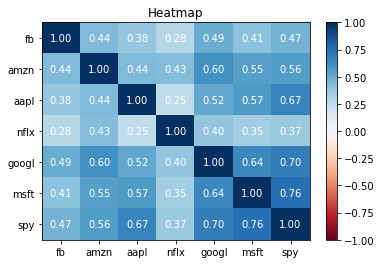

In [38]:
#for fun, looks cool
#heat map visualization
hm = price.plot_corr_heatmap()
hm